In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

def set_matplotlib_style():
    pd.set_option("display.max_columns", 500)
    sns.set_style("ticks")
    font = {
        "font.family": "Roboto",
        "font.size": 12,
    }
    sns.set_style(font)
    paper_rc = {
        "lines.linewidth": 3,
        "lines.markersize": 10,
    }
    sns.set_context("paper", font_scale=2, rc=paper_rc)
    current_palette = sns.color_palette()
    cmp = sns.color_palette("tab10")
    matplotlib.rcParams["pdf.fonttype"] = 42
    matplotlib.rcParams["ps.fonttype"] = 42
    
set_matplotlib_style()
full_df = pd.read_csv("../.local/benchmark_marlin.csv")
full_df

,M,K,num_reqs,num_models,dist,func_for_loop,func_improved_v1,func_fp16,func_improved_v2
0,4096,4096,100,2,uniform,0.643072,0.489728,0.657408,0.562272
1,4096,4096,100,2,zipf:1.5,0.639136,0.489472,0.578784,0.475136
2,4096,4096,100,2,zipf:2.0,0.640000,0.493568,0.602112,0.488448
3,4096,4096,100,4,uniform,1.063936,0.628736,0.994304,0.507712
4,4096,4096,100,4,zipf:1.5,1.022976,0.592864,0.992256,0.506880
...,...,...,...,...,...,...,...,...,...
100,4096,4096,100,64,zipf:1.5,8.439712,2.825504,8.495104,1.077248
101,4096,4096,100,64,zipf:2.0,7.308288,2.510848,7.374592,1.050624
102,4096,4096,100,100,uniform,12.142784,3.868928,12.204768,1.390688
103,4096,4096,100,100,zipf:1.5,10.698752,3.445024,10.732544,1.239040


In [8]:
results = []
for row in full_df.iterrows():
    results.append({
        "time": row[1]['func_for_loop'],
        "function": "for_loop",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
    results.append({
        "time": row[1]['func_fp16'],
        "function": "fp16",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
    results.append({
        "time": row[1]['func_improved_v1'],
        "function": "Ours",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
    results.append({
        "time": row[1]['func_improved_v2'],
        "function": "Ours+",
        "num_models": row[1]['num_models'],
        "distribution": row[1]['dist']
    })
new_df = pd.DataFrame(results)
new_df

,time,function,num_models,distribution
0,0.643072,for_loop,2,uniform
1,0.657408,fp16,2,uniform
2,0.489728,Ours,2,uniform
3,0.562272,Ours+,2,uniform
4,0.639136,for_loop,2,zipf:1.5
...,...,...,...,...
415,1.239040,Ours+,100,zipf:1.5
416,10.464256,for_loop,100,zipf:2.0
417,10.507264,fp16,100,zipf:2.0
418,3.385408,Ours,100,zipf:2.0


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

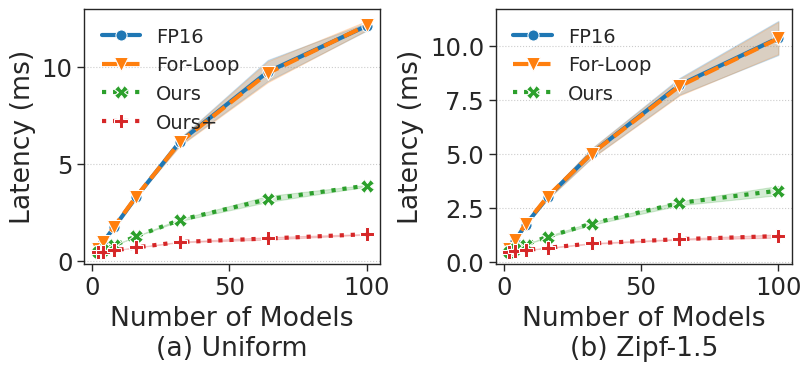

findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

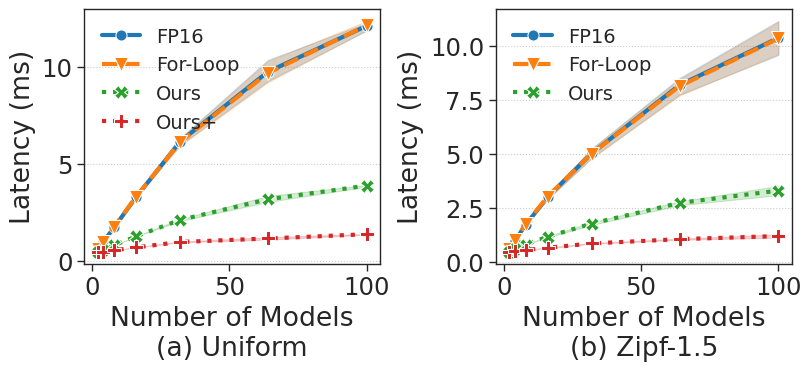

In [10]:
zipf_df = new_df[new_df["distribution"] == "zipf:1.5"]
uniform_df = new_df[new_df["distribution"] == "uniform"]

mean = zipf_df.groupby(by=["function","distribution","num_models"], as_index = False).mean()

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
grid_params=dict(width_ratios=[1, 1])
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, gridspec_kw=grid_params, constrained_layout=True, figsize=(8, 3.6))

policy_list = ["fp16", "for_loop", "Ours", "Ours+"]

sns.lineplot(x=uniform_df.num_models, y=uniform_df.time, hue=uniform_df.function, hue_order=policy_list, errorbar=('ci', 95), ax=ax1)

# ax1.set_ylim(0, 3)
ax1.lines[0].set_marker("o")
ax1.lines[1].set_marker("v")
ax1.lines[2].set_marker("X")
ax1.lines[3].set_marker("P")

ax1.lines[0].set_markersize(8)
ax1.lines[1].set_markersize(10)
ax1.lines[2].set_markersize(10)
ax1.lines[3].set_markersize(10)

ax1.lines[0].set_linestyle("-")
ax1.lines[1].set_linestyle("--")
ax1.lines[2].set_linestyle(":")
ax1.lines[3].set_linestyle(":")

# ax1.set_xticks([0.5, 1.0, 1.5, 2.0, 2.5])
# ax1.set_xticklabels(["0.5x", "1.0x", "1.5x", "2.0x", "2.5x"])

# ax1.set_yticks([0, 1, 2, 3])
ax1.set_xlabel("Number of Models\n(a) Uniform")
ax1.set_ylabel("Latency (ms)")

ax1.grid(axis="y", linestyle=":")
ax1.legend(handles=ax1.lines, labels=["FP16", "For-Loop", "Ours", "Ours+"],loc=0, frameon=False, fontsize=14)

sns.lineplot(x=zipf_df.num_models, y=zipf_df.time, hue=zipf_df.function, hue_order=policy_list, errorbar=('ci', 95), ax=ax2)

# ax1.set_ylim(0, 3)
ax2.lines[0].set_marker("o")
ax2.lines[1].set_marker("v")
ax2.lines[2].set_marker("X")
ax2.lines[3].set_marker("P")

ax2.lines[0].set_markersize(8)
ax2.lines[1].set_markersize(10)
ax2.lines[2].set_markersize(10)
ax2.lines[3].set_markersize(10)

ax2.lines[0].set_linestyle("-")
ax2.lines[1].set_linestyle("--")
ax2.lines[2].set_linestyle(":")
ax2.lines[3].set_linestyle(":")

# ax2.set_xticks([0.5, 1.0, 1.5, 2.0, 2.5])
# ax2.set_xticklabels(["0.5x", "1.0x", "1.5x", "2.0x", "2.5x"])
ax2.set_xlabel("Number of Models\n(b) Zipf-1.5")
ax2.set_ylabel("Latency (ms)")
ax2.grid(axis="y", linestyle=":")
ax2.legend(handles=ax1.lines, labels=["FP16", "For-Loop", "Ours"],loc=0, frameon=False, fontsize=14)
fig
# fig.savefig("../.local/kernel_benchmark.pdf", bbox_inches='tight')